In [ ]:
from google.colab import drive
drive.flush_and_unmount()


Drive not mounted, so nothing to flush and unmount.


In [ ]:
import shutil

# Remove the directory if it exists
shutil.rmtree('/content/drive', ignore_errors=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import librosa
import os
import soundfile as sf
#from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
import pandas as pd



# audio_file_path = '/content/drive/MyDrive/Gorilla Project/input_dir/Gorilla Sounds/217_ male_gorilla_PortLympne.wav_transposed_+12_RAW.wav'
# y, sr = librosa.load(audio_file_path, sr=None, mono=False)
# file_name = os.path.basename(audio_file_path)  # Extract file name


In [ ]:
sr

44100

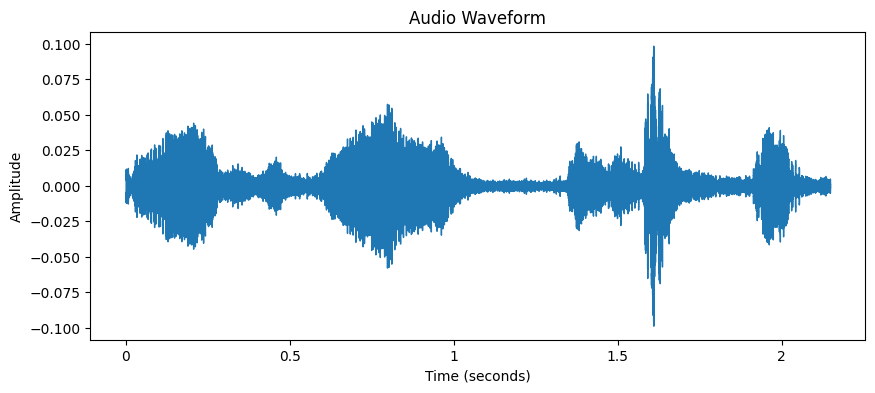

In [ ]:
# Plot the audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()



In [ ]:
# Preprocess the audio
y /= np.max(np.abs(y))  # Normalize the audio

# Apply ICA
n_components = 2  # Number of components to estimate
ica = FastICA(n_components=n_components, whiten=True)
S_ = ica.fit_transform(y.T)  # Transpose y to ensure correct shape for ICA


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:123: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


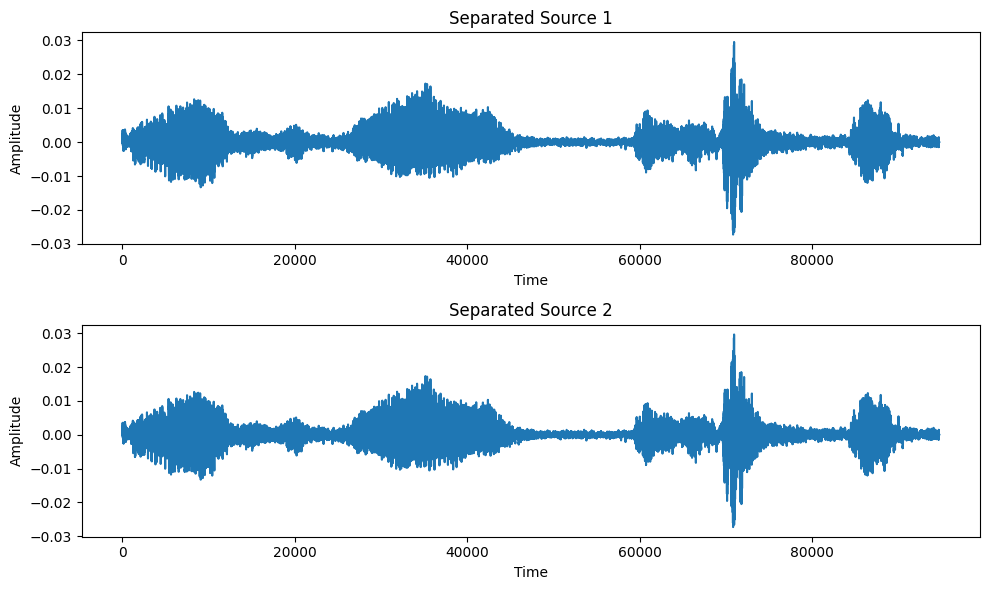

In [ ]:
# Plot the separated sources
plt.figure(figsize=(10, 6))
for i in range(n_components):
    plt.subplot(n_components, 1, i+1)
    plt.plot(S_[:, i])
    plt.title(f'Separated Source {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()